In [109]:
using Pkg; Pkg.activate(".")
using PyPlot
using MUST
using DelimitedFiles

MUST.@import_dispatch "/u/peitner/DISPATCH/dispatch2/";

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/initial_conditions/Project.toml`


# Target properties of the model

In [110]:
Teff = 5777.0
logg = log(2.75e4);

The corresponding model we want to compare it to

In [111]:
path  = MUST.@in_dispatch("input_data/solar_stagger_ext")
path  = abspath.("../stagger2bifrost/stagger_av.dat")
#path  = "staggertest.dat"
model = reverse(readdlm(path, skipstart=2), dims=1)
z_goal, T_goal, d_goal = model[:, 1], model[:, 2], exp.(model[:, 3]);

The corresponding box dimensions based on the scale height

In [112]:
MUST.box_dimensions(Teff, exp(logg))

Dict{Symbol, Float64} with 2 entries:
  :z => 4.0299
  :x => 1.49682

EoS + Opacities

In [113]:
#eos_path = "input_data/LegacyStagger_sun"
eos_path = "input_data/TSO_sun_Magg_v10.2"
eos_path = "input_data/DIS_AESOPUS_v1.3.3"
eos_path = "input_data/DIS_MARCS_v0.3.1"
#eos_path = "input_data/DISSTAG_v0.1"

eos      = MUST.SquareGasEOS(MUST.@in_dispatch(eos_path));

# 1. Investigate the Adiabat

In [114]:
## Initial point of the simulation
T_ini  = 11000.0
ρ_ini  = exp10(-6.4) #2.9e-7
z0     = -0.3 #MUST.geometrical_depth(d_goal, ρ_ini, z_goal) / 1e8 ;
ee_idx = argmin(abs.(z_goal .- 0.5e8))
E_surf = MUST.bisect(eos; ee=MUST.limits(eos)[3:4], d=d_goal[ee_idx], T=T_goal[ee_idx])
#z0     = MUST.match(T_ini, ρ_ini, logg, z_goal, T_goal, d_goal, eos; ee_min=E_surf/MUST.StaggerCGS().ee, nz=400, i0=100, hotspot=-2.5, which=:d) 

@info T_ini ρ_ini z0 log(E_surf) 

┌ Info: 11000.0
│   ρ_ini = 3.981071705534969e-7
│   z0 = -0.3
│   log(E_surf) = 28.872019
└ @ Main /u/peitner/DISPATCH/MUST.jl/examples/initial_conditions/initial_conditions.ipynb:9


In [115]:
E_surf/MUST.StaggerCGS().ee

3.459059810304

In [116]:
z,d,ee,t,p = MUST.initial_adiabat(eos, T_ini, ρ_ini, exp(logg), ee_min=E_surf/MUST.StaggerCGS().ee, nz=400, i0=102, z0_position=z0);

Temperature density diagram

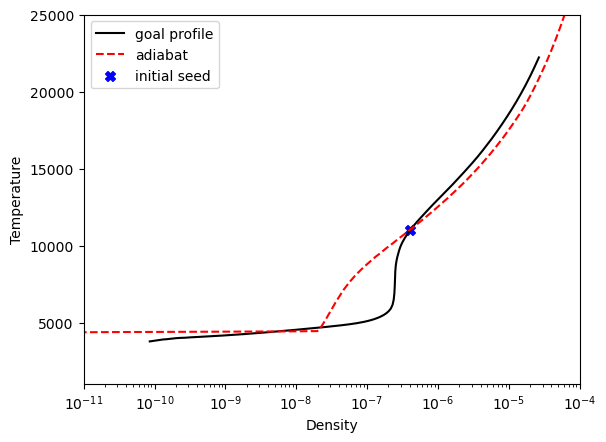

In [117]:
## Plotting
close()

# Curves
plt.plot(d_goal, T_goal, color="k",          label="goal profile")
plt.plot(d,      t,      color="r", ls="--", label="adiabat")

## initial point
plt.scatter([ρ_ini], [T_ini], color="b", marker="X", s=50, label="initial seed")

## Setup
plt.xlim(1e-11, 1e-4)
plt.ylim(1000, 25000)

#plt.axvline(3e-7)
#plt.axhline(10000)

## labels
plt.xlabel("Density")
plt.ylabel("Temperature")
plt.xscale("log")
plt.legend();

gcf()

Profiles against geometrical depth

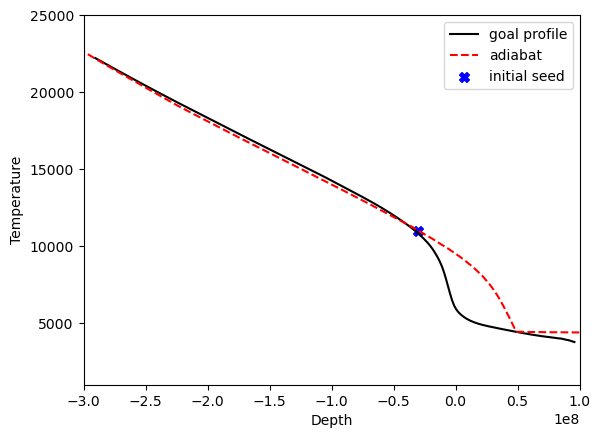

In [118]:
## Plotting
close()

# Curves
plt.plot(z_goal, T_goal, color="k",          label="goal profile")
plt.plot(z*1e8,      t,      color="r", ls="--", label="adiabat")

## initial point
plt.scatter([z0*1e8], [T_ini], color="b", marker="X", s=50, label="initial seed")

## Setup
plt.xlim(-3e8, 1e8)
plt.ylim(1000, 25000)

## labels
plt.xlabel("Depth")
plt.ylabel("Temperature")
plt.legend();

gcf()

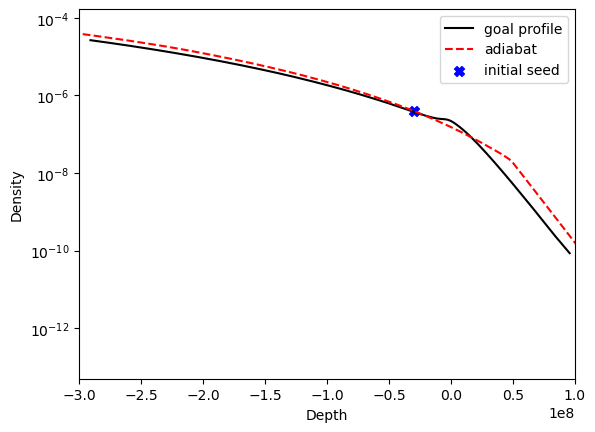

In [119]:
## Plotting
close()

# Curves
plt.plot(z_goal, d_goal, color="k",          label="goal profile")
plt.plot(z*1e8,      d,      color="r", ls="--", label="adiabat")

## initial point
plt.scatter([z0*1e8], [ρ_ini], color="b", marker="X", s=50, label="initial seed")

## Setup
plt.xlim(-3e8, 1e8)
#plt.ylim(1000, 25000)

## labels
plt.xlabel("Depth")
plt.ylabel("Density")
plt.yscale("log")
plt.legend();

gcf()